<a href="https://colab.research.google.com/github/jyothi-sk/Unsupervised-ML/blob/main/Online_Retail_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customr Segmentation



##### **Project Type**    - Unsupervized ML
##### **Contribution**    - Individual


# **Project Summary -**

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business

The project is about identifying major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Data Description:**

*   **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   **Description**: Product (item) name. Nominal.
*   **Quantity**: The quantities of each product (item) per transaction. Numeric.
*   **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.
*   **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
*   **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   **Country**: Country name. Nominal, the name of the country where each customer resides.

# **Problem Statement**


To identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

# **Let's Begin !**

**Importing Libraries**

In [551]:
# importing numpy and pandas
import numpy as np
import pandas as pd

# Importing Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import matplotlib.cm as cm

# Import Libraries
from numpy import math
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, time
plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})

# Importing libraries necessary for clustering
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans



**Dataset Loading**

In [552]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [553]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Module4_ML/Unsupervised_ML_Capstone_Project/Online_Retail_Dataset.csv')

**Dataset First View**

In [554]:
# Dataset First Look
df.head()


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [555]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/11 12:50       0.85     12680.0  France  
541905  12/9/11 12:50       2.10     12680.0  France  
541906  12/9/11 12:50       4.15     12680.0  France  
541907  12/9/11 12:50       4.15     12680.0  France  
541908  12/9/11 12:50       4.95     12680.0  France

In [556]:
# Dataset Rows & Columns count
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 541909
Number of columns: 8


In [557]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


From above information we can observe that there are numerical and categorical features in this dataset. Features - 'Description' and 'CustomerID' are having few null values.

In [558]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

##**Data Wrangling**

In [559]:
# converting customer id column to 'object' type
df['CustomerID'] = df['CustomerID'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [560]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

**Observations:** We can see that there are 5268 duplicate rows in this dataset.

In [561]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [562]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

<Figure size 1000x600 with 0 Axes>

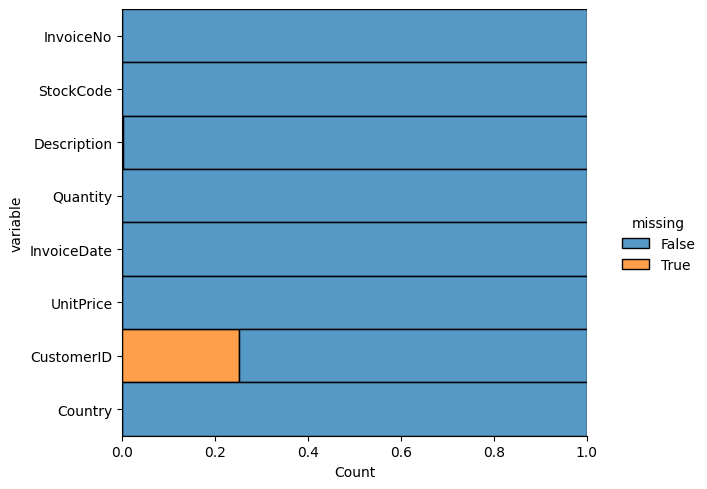

In [563]:
# Visualizing the missing values

plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

**Observation**: We can see that 'Description' and 'CustomerID' features have
missing values.


In [564]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

# Verifying the removal of missing values
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Few Invoice numbers starts with letter 'C', which indicates cancelled invoice. We can drop the 'InvoiceNo' feature.**

In [565]:
# Converting the column 'InvoiceNo' as string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')


In [566]:
# Lets check the InviceNo that starts with 'C'
df[df['InvoiceNo'].str.contains('C')]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate  UnitPrice CustomerID         Country  
141      12/1/10 9:41      27.50    14527.0  United Kingdom  
154      12/1/10 9:49       4.65    15311.0  United Kingdom  
235     12/1/10 10:24       1.65    17548.0  United Kingdom  
236     12/1/10 10:24       0.29    17548.0  United Kingdom  
237     12/1/10 10:24       0.29    17548.0  United Kingdom  
...               ...        ...        ...             ...  
540449   12/9/11 9:57       0.83    14397.0  United Kingdom  
541541  12/9/11 10:28     224.69    15498.0  United Kingdom  
541715  12/9/11 11:57      10.95    15311.0  United Kingdom  
541716  12/9/11 11:58       1.25    17315.0  United Kingdom  
541717  12/9/11 11:58       1.25    17315.0  United Kingdom  

[8872 rows x 8 columns]

In [567]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [568]:
df.shape

(392732, 8)

**Converting 'InvoiceDate' column into 'year', 'month', 'day', 'hour', 'minute' and 'second'.**

In [569]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%y %H:%M")

In [570]:
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month_name()
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day_name()
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [571]:
print(f"{df.dtypes} \n\n\n{df.shape}")

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
InvoiceDate_year               int64
InvoiceDate_month             object
InvoiceDate_day               object
InvoiceDate_hour               int64
InvoiceDate_minute             int64
InvoiceDate_second             int64
dtype: object 


(392732, 14)


In [572]:
#checking rows count with unitprice == 0.

price_df = df[df.UnitPrice==0]
price_df.shape

(40, 14)

**Adding a column for total_amount from quantity and unitprice columns:**

In [573]:
df['total_amount'] = df['Quantity']*df['UnitPrice']

**Manipulations done**:

*   As CustomerID column is the id of each customer, so converted the 'CustomerID' column to 'Object' type.

*   There are 5268 duplicate rows in the dataset so, dropped the duplicate rows.

*   There are missing values in customerid column, without customer id rest of the details are not useful, so, Dropped the rows with missing values from the 'Description' and 'CustomerID' features.

*   Dropping Invoice Numbers which starts with 'C' as it indicates a cancellation and these are not required for data analysis.

*   Dropping the rows having zero & negative values in columns 'Quantity' and 'Unit Price', as they should contain positive values.

*   extracted new features from InvoiceDate feature, creating new features - year, month, day, hour, minute and second.

*   Created a new feature total_amount by multiplying 'Quantity' and 'Unit Price' features, as it gives the total amount spent by each customer.



In [574]:
# Dataset description
df.describe().T

count         mean         std     min      25%  \
Quantity            392732.0    13.153718  181.588420     1.0     2.00   
UnitPrice           392732.0     3.125596   22.240725     0.0     1.25   
InvoiceDate_year    392732.0  2010.934630    0.247178  2010.0  2011.00   
InvoiceDate_hour    392732.0    12.721579    2.276677     6.0    11.00   
InvoiceDate_minute  392732.0    30.406244   17.081162     0.0    16.00   
InvoiceDate_second  392732.0     0.000000    0.000000     0.0     0.00   
total_amount        392732.0    22.629195  311.083465     0.0     4.95   

                        50%      75%        max  
Quantity               6.00    12.00   80995.00  
UnitPrice              1.95     3.75    8142.75  
InvoiceDate_year    2011.00  2011.00    2011.00  
InvoiceDate_hour      13.00    14.00      20.00  
InvoiceDate_minute    31.00    45.00      59.00  
InvoiceDate_second     0.00     0.00       0.00  
total_amount          12.39    19.80  168469.60

In [575]:
df.describe(include='object').T

count  unique                                 top  \
InvoiceNo            392732   18536                              576339   
StockCode            392732    3665                              85123A   
Description          392732    3877  WHITE HANGING HEART T-LIGHT HOLDER   
CustomerID         392732.0  4339.0                             17841.0   
Country              392732      37                      United Kingdom   
InvoiceDate_month    392732      12                            November   
InvoiceDate_day      392732       6                            Thursday   

                     freq  
InvoiceNo             542  
StockCode            2023  
Description          2016  
CustomerID         7676.0  
Country            349227  
InvoiceDate_month   63182  
InvoiceDate_day     79260

**Description:**
*   We can see that 'Quantity' has negative minimum value.
*   'UnitPrice' features seems normally distributed as its mean value and 50%, to 75% values are evenly distributed but has 0 minimum value.
*   From CustomerID we can see that there are 4372 unique customers.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [576]:
# Chart - 1 visualization code  - plot of dependent variable
customers_count=pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
customers_count.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)

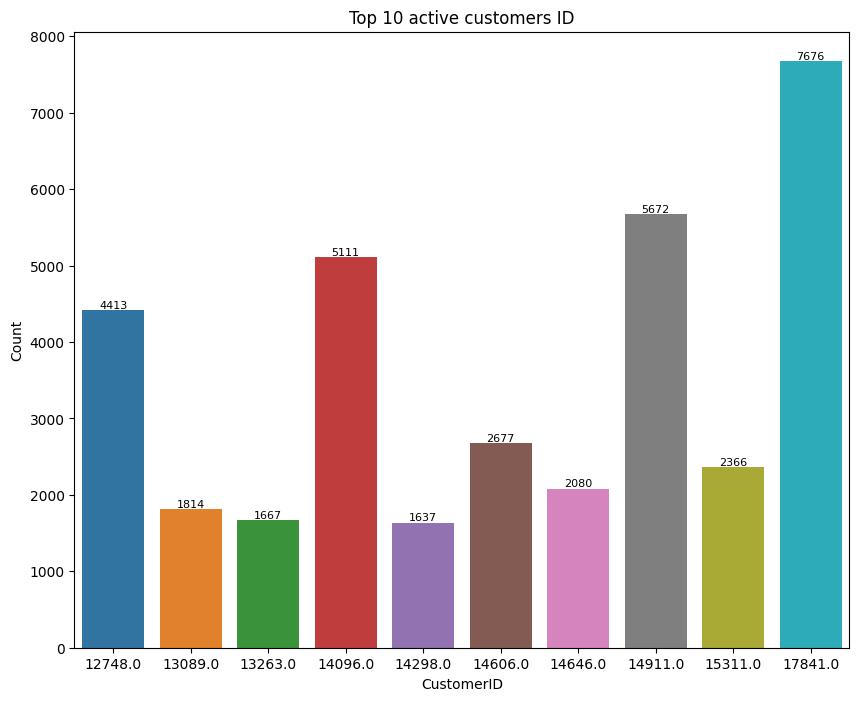

In [577]:
plt.figure(figsize=(10,8))
plt.title('Top 10 active customers ID')
ax = sns.barplot(x='CustomerID',y='Count',data=customers_count[:10])
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Chart used & Insights found**: Bar plot gives the count of each value of a feature. We can see the Top 10 customers count from the plot and ID 17841 is the top customer.

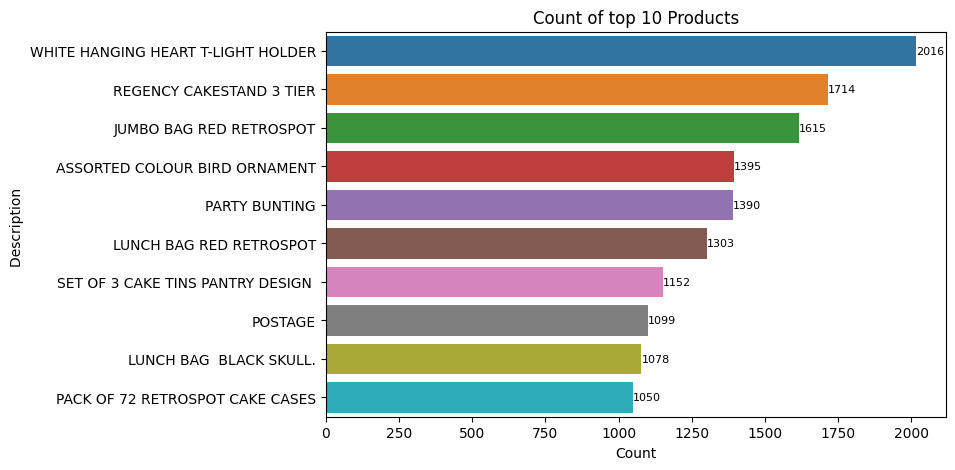

In [578]:
# Chart - 2 bar chart for top 10 descriptions
Descriptions_sorted = df['Description'].value_counts().reset_index().rename(columns={"index":"Description ", 'Description':'Count'})

fig= plt.subplots(figsize = (8,5))
ax=sns.barplot(y='Description ',x='Count', data=Descriptions_sorted[:10])
plt.title("Count of top 10 Products")
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights:** 'WHITE HANGING HEART T-LIGHT HOLDER' is the highest selling product with count above 2000.

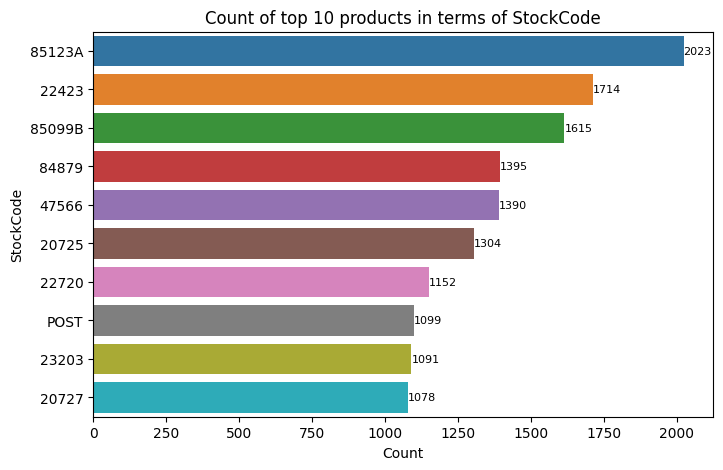

In [579]:
# Chart - 3 visualization code  - histplot of
Descriptions_sorted = df['StockCode'].value_counts().reset_index().rename(columns={"index":"StockCode", 'StockCode':'Count'})

fig= plt.subplots(figsize = (8,5))
ax=sns.barplot(data = Descriptions_sorted[:10], y = 'StockCode', x = 'Count')
plt.title("Count of top 10 products in terms of StockCode")
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights**: StockCode 85123A is the highest selling product.

In [580]:
# Chart - 4 Top 10 countries who bought maximum products
Top_country = df['Country'].value_counts().reset_index()
Top_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_country[:10]


Country_Name   Count
0  United Kingdom  349227
1         Germany    9027
2          France    8327
3            EIRE    7228
4           Spain    2480
5     Netherlands    2363
6         Belgium    2031
7     Switzerland    1842
8        Portugal    1453
9       Australia    1184

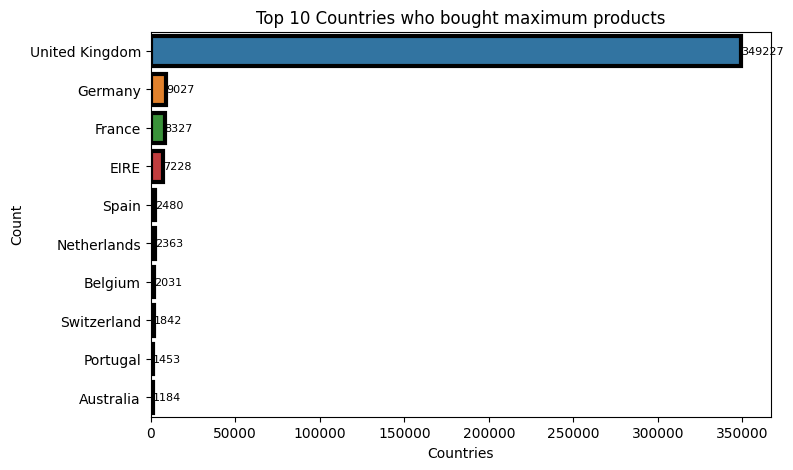

In [581]:
# Barplot of Top 10 countries who's buying maximum products
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Count', y='Country_Name', data=Top_country[:10], edgecolor = 'black', lw =3)
plt.title('Top 10 Countries who bought maximum products')
plt.xlabel('Countries')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights**: From the plots we can see that most of the customers are from United Kingdom.

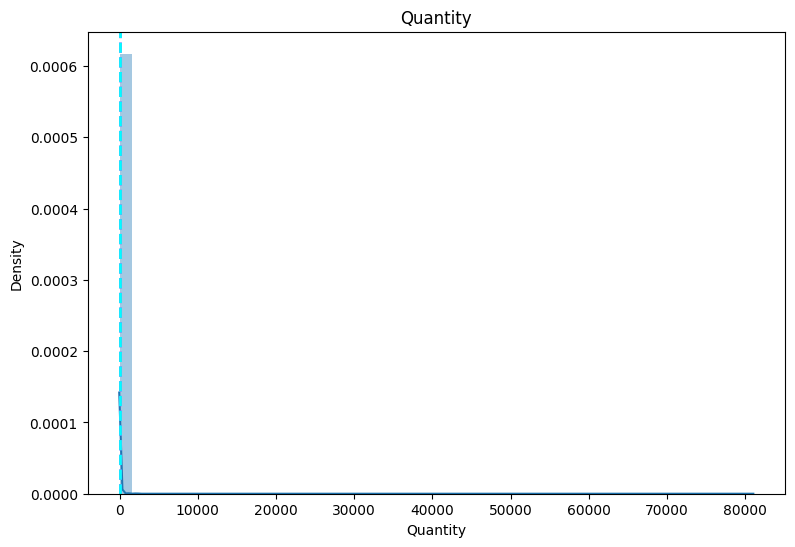

Skewness : 400.8117144489054
Kurtosis : 171772.12450262278


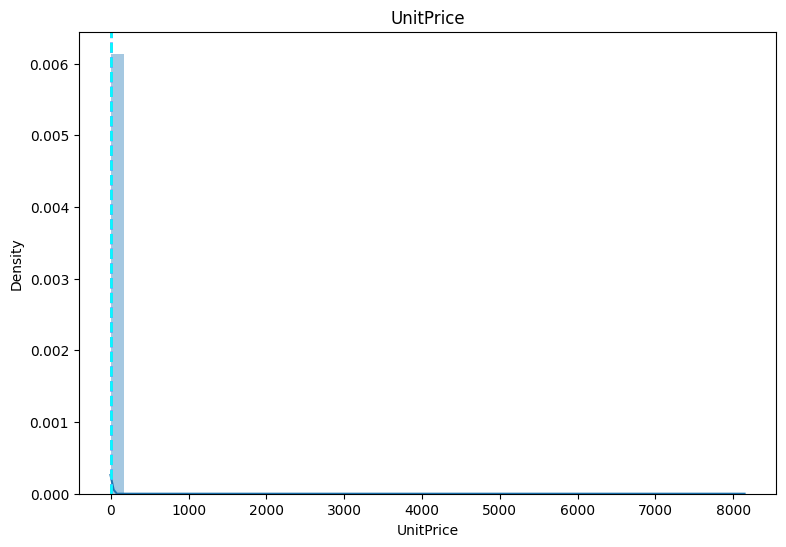

Skewness : 202.75061725718567
Kurtosis : 57403.96255594054


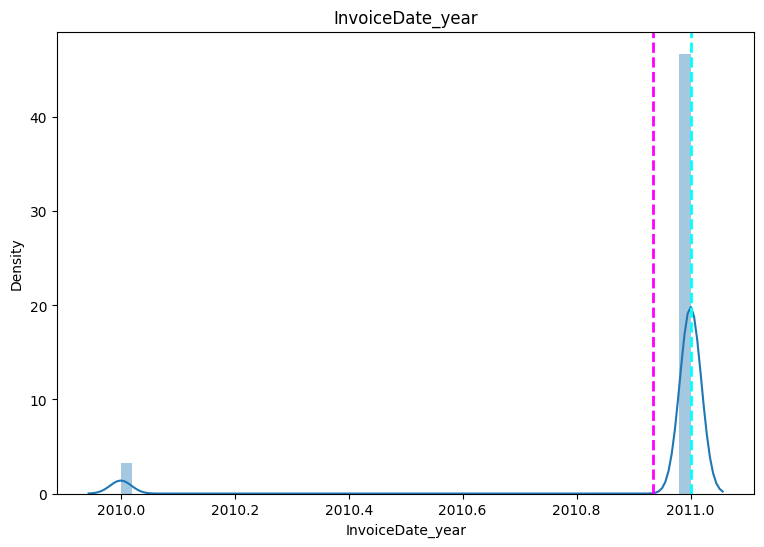

Skewness : -3.5167469285537045
Kurtosis : 10.367561756595565


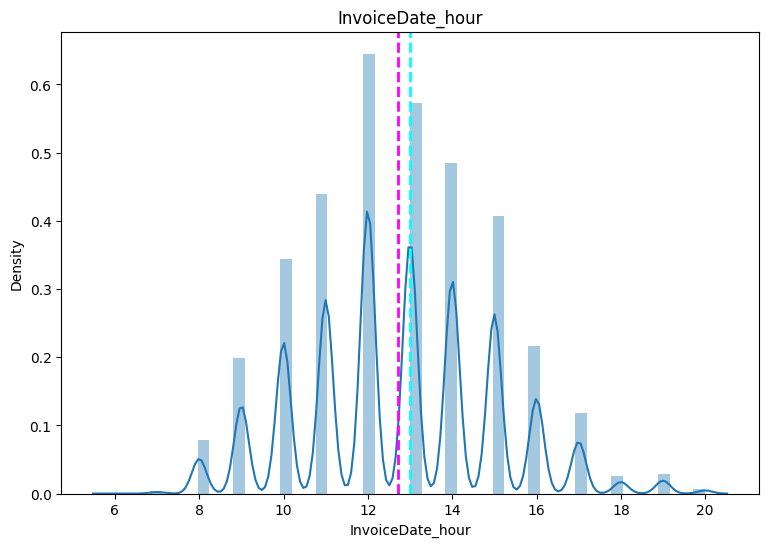

Skewness : 0.18708090962435506
Kurtosis : -0.22002250912534427


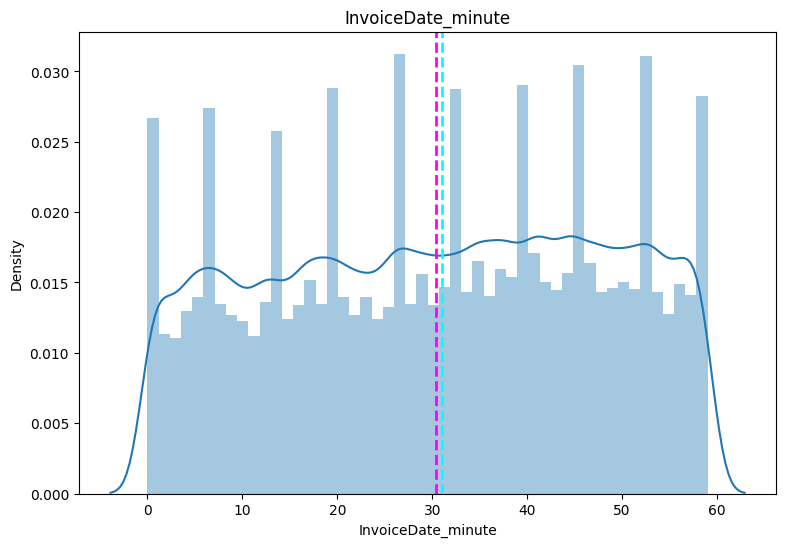

Skewness : -0.08049184573623291
Kurtosis : -1.1661140967814052


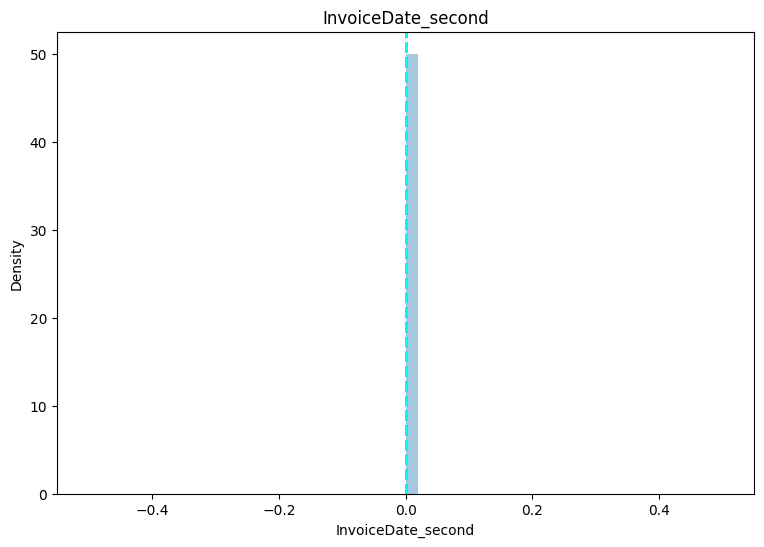

Skewness : 0
Kurtosis : 0


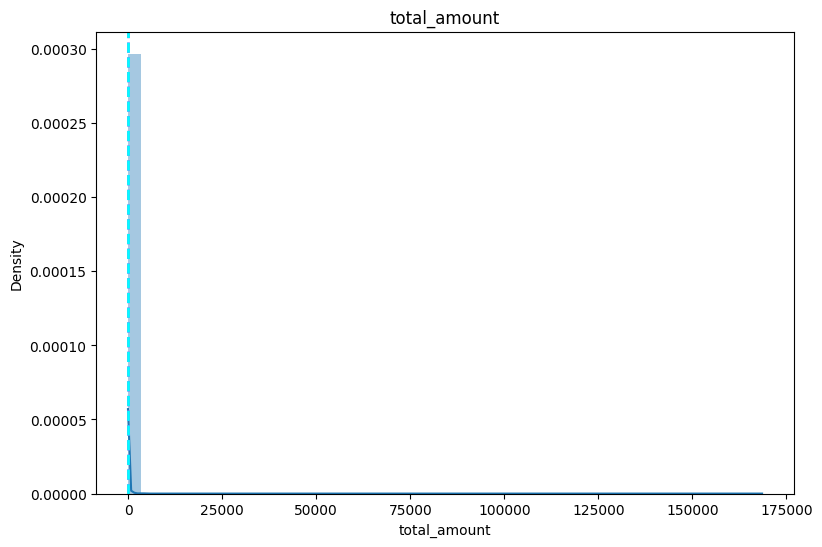

Skewness : 448.5442811269849
Kurtosis : 229171.9647792387


In [582]:
# Chart - 5 Distribution of numerical features

numerical_features = df.describe(include='number').columns

for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

**Insights**: From the above plot we can understand that the feature is highly right skewed.

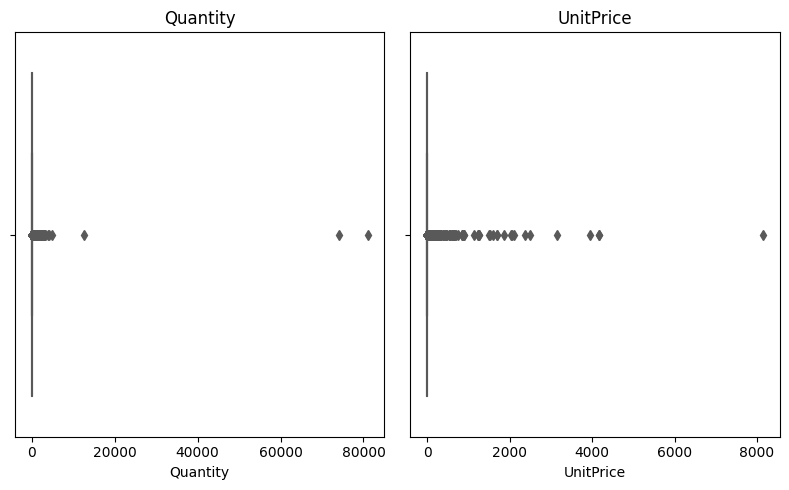

In [583]:
# Chart - 6 visualization code - boxplots for numerical features
fig, ax= plt.subplots(nrows=1, ncols=2, figsize = (8,5))
ax=ax.flatten()
sns.boxplot(data = df, x = df['Quantity'], ax=ax[0], palette = 'Set2')
sns.boxplot(data = df, x = df['UnitPrice'], ax=ax[1], palette = 'Set2')
#[fig.delaxes(ax) for ax in ax.flatten() if not ax.has_data()]
ax[0].title.set_text("Quantity")
ax[1].title.set_text("UnitPrice")
plt.tight_layout()
plt.show()


**Plot used**: The boxplot is ideal for understanding the presence of outliers in the features.

**Insights found**:From the above plot we can observe that there are outliers in both 'Quantity' and 'UnitPrice' columns.

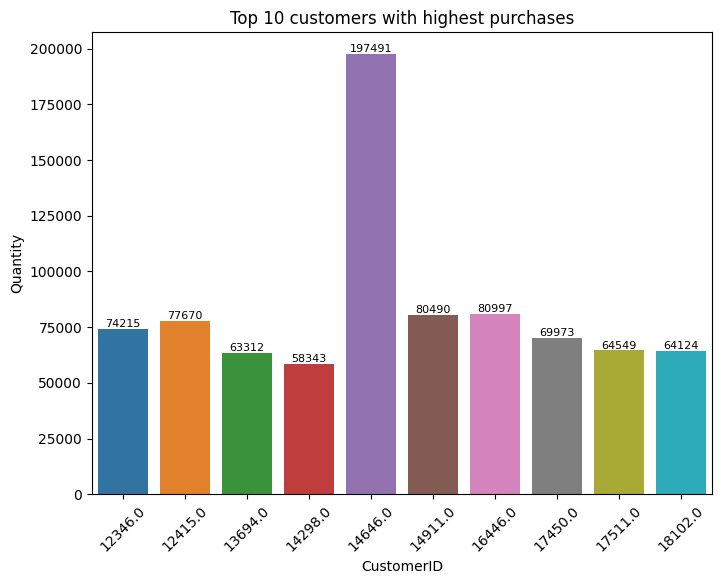

In [584]:
# Chart - 7 Top ten customers who has ordered maximum quantity.

Top_10=df.groupby(['CustomerID'])['Quantity'].sum().reset_index().sort_values(by="Quantity" ,ascending=False ).head(10)
# create a bar plot
ax=sns.barplot(x='CustomerID', y='Quantity', data=Top_10)
plt.title('Top 10 customers with highest purchases')
ax.bar_label(ax.containers[0], fontsize=8);
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

**Plot used:** The bar plot is good for bivariate comparison.

**Insights found:** From above plot we understand that customer 14646.0 has purhased the highest quantity.

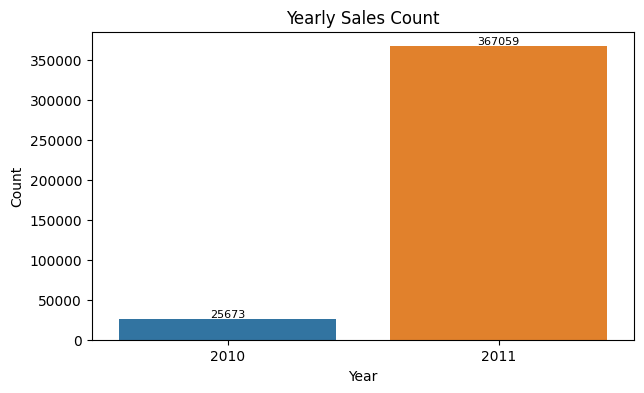

In [585]:
# Chart - 8 Sales count w.r.t. every year
years_count = df['InvoiceDate_year'].value_counts().reset_index().rename(columns={'index': 'Year', 'InvoiceDate_year': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x='Year', y='Count',data=years_count)
plt.title('Yearly Sales Count')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights found:** The above chart indicates that most of customers both in 2011 compared to 2010.

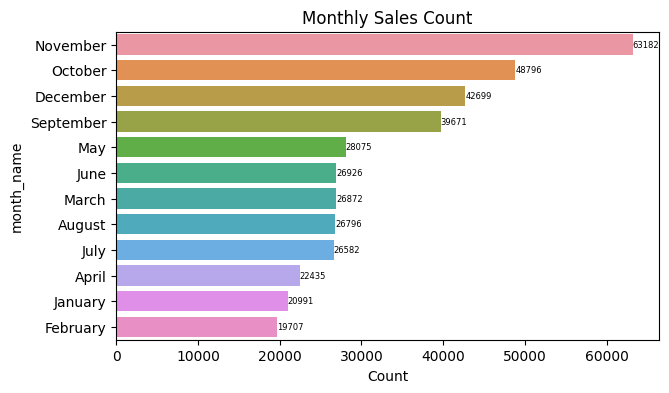

In [586]:
# Chart - 9 sales count w.r.t. every month
months_count = df['InvoiceDate_month'].value_counts().reset_index().rename(columns={'index': 'month_name', 'InvoiceDate_month': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(y='month_name', x='Count',data=months_count)
plt.title('Monthly Sales Count')
ax.bar_label(ax.containers[0], fontsize=6);
plt.show()

**Insights found:** We can see that the sales is highest in november, october and december, it might be due to festival season, and sales is least in February, maybe due to end of financial year.

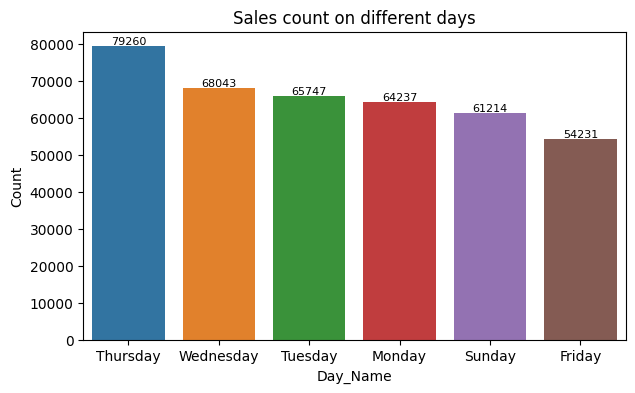

In [587]:
# Chart - 10 sale of the pruducts w.r.t days of the week.
days_count = df['InvoiceDate_day'].value_counts().reset_index().rename(columns={'index': 'Day_Name', 'InvoiceDate_day': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x='Day_Name',y='Count',data=days_count)
plt.title('Sales count on different days')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights found:** We can see that the sales are higher on Thursdays and least on Fridays. There are no sales on saturdays, that could be due to no data of saturdays or no purchase done on saturdays for some reason.

In [588]:
# Chart - 11 sales count w.r.t. time of the day

#unique values of hour feature
df['InvoiceDate_hour'].unique()


array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [589]:
def time_sort(time):
  if time in [6,7,8,9,10,11]:
    return 'Morning'
  elif time in [12, 13, 14, 15, 16]:
    return 'Afternoon'
  else:
    return 'Evening'

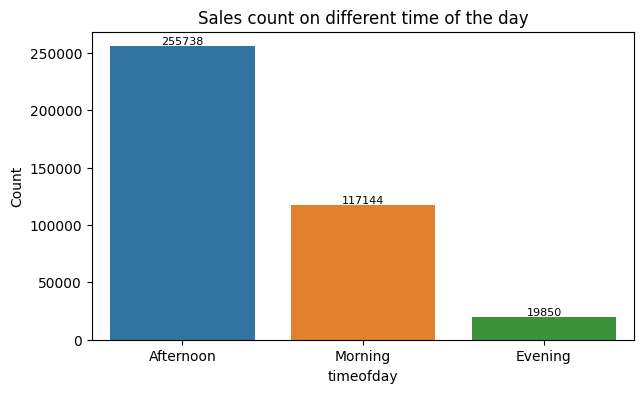

In [590]:
df['time_of_day'] = df['InvoiceDate_hour'].apply(time_sort)
timeofday_count = df['time_of_day'].value_counts().reset_index().rename(columns={'index': 'timeofday', 'time_of_day': 'Count'})

fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x='timeofday',y='Count',data=timeofday_count)
plt.title('Sales count on different time of the day')
ax.bar_label(ax.containers[0], fontsize=8);
plt.show()

**Insights:** From the above chart we can see that highest sales count is in the afternoon and least in the evening time.

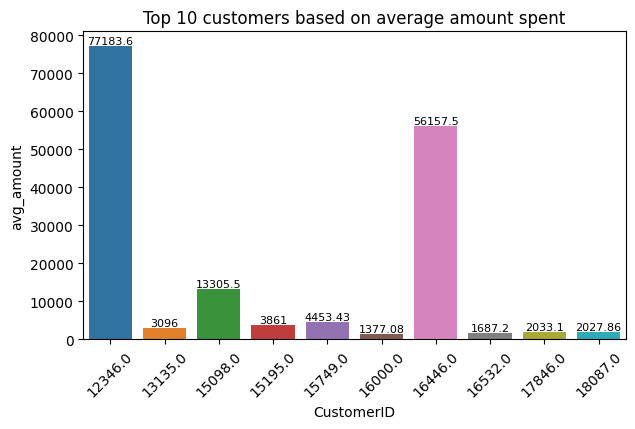

In [591]:
# Chart - 12
Avg_amount = df.groupby('CustomerID')['total_amount'].mean().reset_index().rename(columns={'total_amount':'avg_amount'}).sort_values(by = ['avg_amount'], ascending=False)
fig= plt.figure(figsize = (7,4))
ax = sns.barplot(x=Avg_amount['CustomerID'].head(10), y=Avg_amount['avg_amount'].head(10),data=Avg_amount.head(10))
plt.title('Top 10 customers based on average amount spent')
ax.bar_label(ax.containers[0], fontsize=8);
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

**Insights:** From the chart, we can see that the **highest average amount** spent is 77183.6/- by the **customer 12346.0** and 2nd highest is 56157.5/- by **customer 16446.0**.

In [592]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second', 'total_amount',
       'time_of_day'],
      dtype='object')

<Axes: >

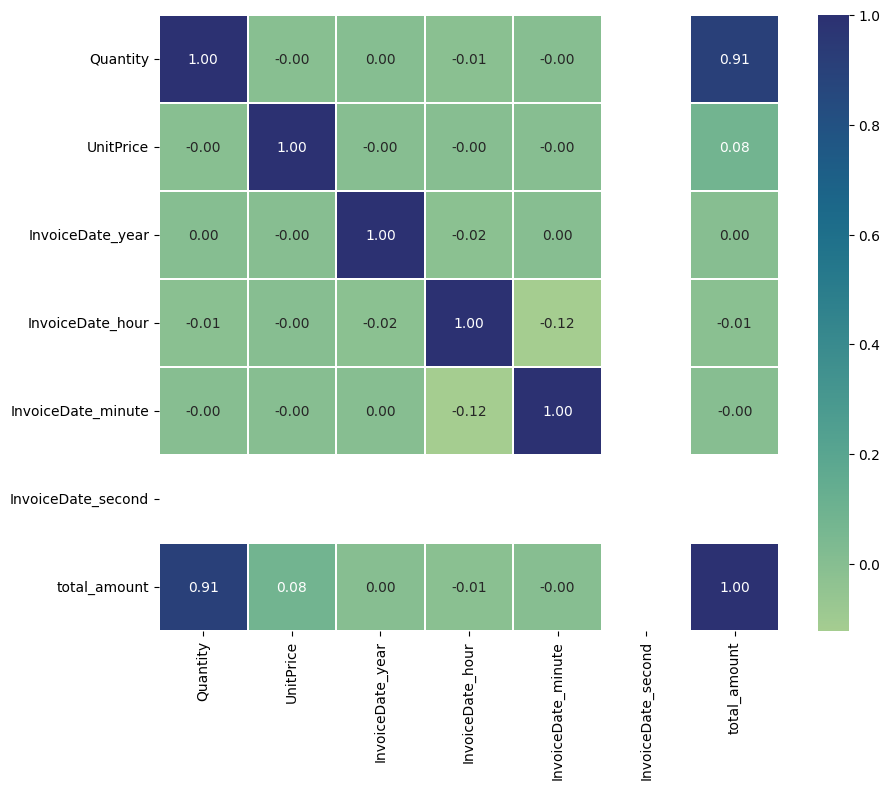

In [593]:
#Chart - 13 - Correlation Heatmap
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, fmt=".2f", cmap='crest', linewidths=0.1)

**Insights found:** From the plot, Total_amount and Quantity are highly correlated which is obvious.

In [594]:
df['InvoiceDate_second'].value_counts()

0    392732
Name: InvoiceDate_second, dtype: int64

As the seconds column value is 0 for all rows, we can drop this feature.

In [595]:
df.drop('InvoiceDate_second', axis=1, inplace=True)

##**Create the RFM model (Recency, Frequency and Monetary value)**

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

*  **Recency**: How recently a customer has made a purchase, i.e. Latest Date - Last Invoice Data
*  **Frequency**: How often a customer makes a purchase, i.e. Count of invoice no. of transaction(s)
*  **Monetary Value**: How much money a customer spends on purchases, i.e. Sum of total amount for each customer

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

In [596]:
import datetime as dt

# to calculate the number of days from recent purchase, as last invoice date was 2011-12-09, lets set Latest date to 2011-12-10.
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={  'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'total_amount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

**Checking outliers using box plot in recency,frequency and monetary values**

Text(0.5, 0, 'Attribute - Recency')

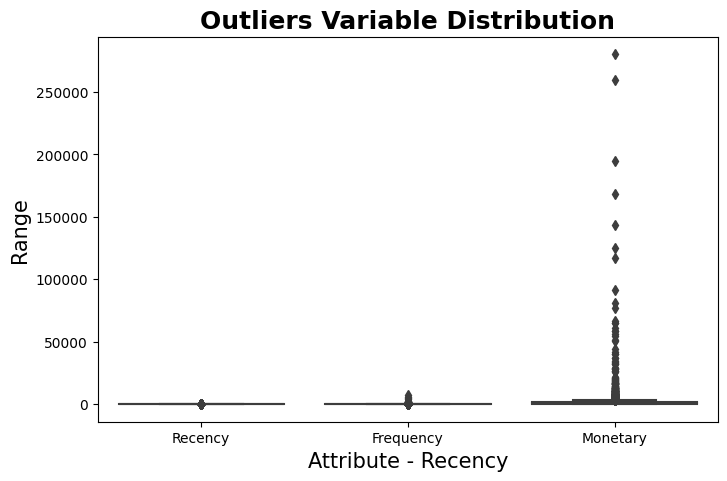

In [597]:
# Box plot of Recency, Frequency and Monetary
plt.rcParams['figure.figsize'] = [8,5]
sns.boxplot(data = rfm_df[['Recency','Frequency','Monetary']])
plt.title("Outliers Variable Distribution", size = 18, weight = 'bold')
plt.ylabel("Range", size = 15)
plt.xlabel("Attribute - Recency", size = 15)

In [598]:
# Removing (statistical) outliers
# Outlier treatment for Recency
Q1 = rfm_df.Recency.quantile(0.05)
Q3 = rfm_df.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df_recency = rfm_df [(rfm_df.Recency <= Q1 - 1.5*IQR) & (rfm_df.Recency >= Q3 + 1.5*IQR)]

# Outlier treatment for Frequency
Q1 = rfm_df.Frequency.quantile(0.05)
Q3 = rfm_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df_freq  = rfm_df [(rfm_df.Frequency <= Q1 - 1.5*IQR) & (rfm_df.Frequency >= Q3 + 1.5*IQR)]

# Outlier treatment for Monetary
Q1 = rfm_df.Monetary.quantile(0.05)
Q3 = rfm_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_df_monetary  = rfm_df [(rfm_df.Monetary <= Q1 - 1.5*IQR) & (rfm_df.Monetary >= Q3 + 1.5*IQR)]

In [599]:
rfm_df_recency.shape, rfm_df_freq.shape, rfm_df_monetary.shape

((0, 3), (0, 3), (0, 3))

**Observation:** From the above technique, we can see that there are no rows with the outliers got removed .

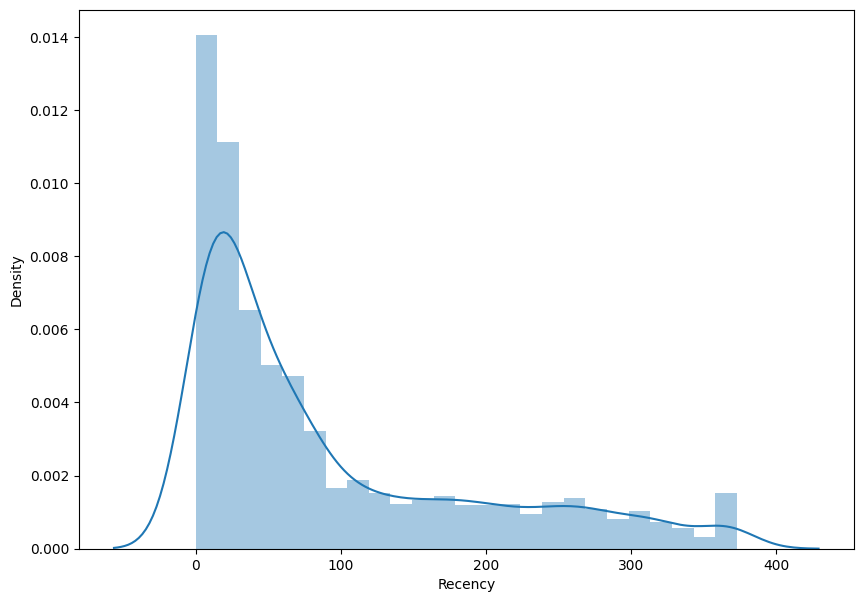

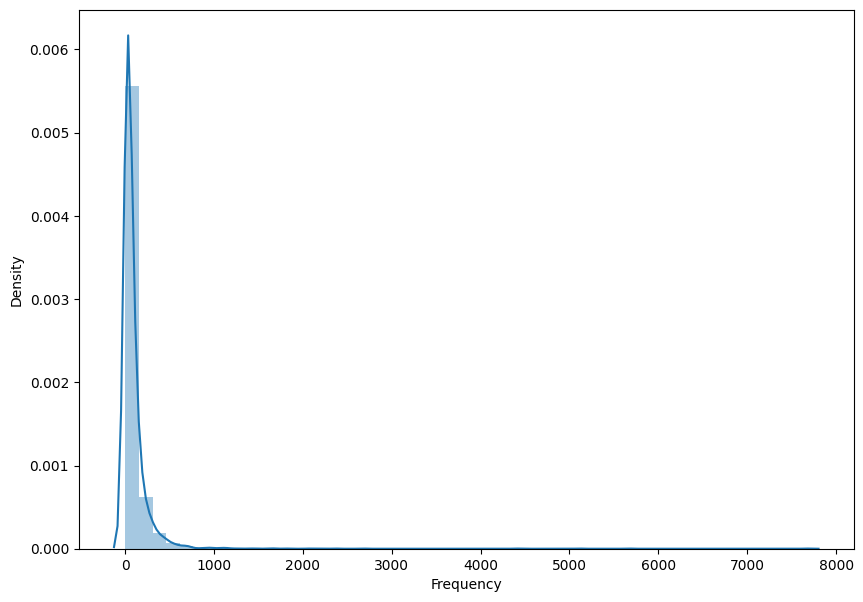

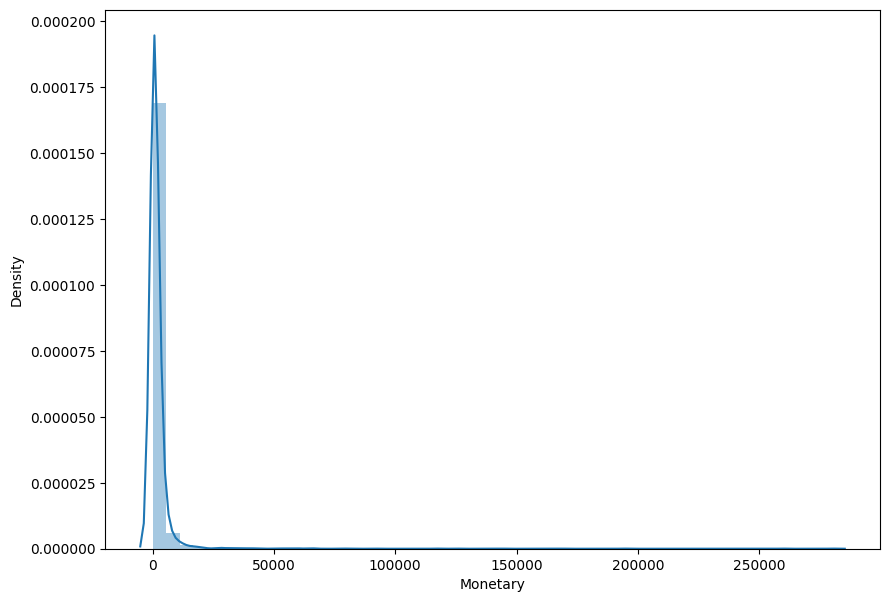

In [600]:
# Recency distribution plot

def plots_rfm(df, r, f, m):
  x = df[r]
  plt.figure(figsize=(10,7))
  sns.distplot(x)

# Frequency distribution plot
  x = df[f]
  plt.figure(figsize=(10,7))
  sns.distplot(x)

# Monetary distribution plot
  x = df[m]
  plt.figure(figsize=(10,7))
  sns.distplot(x)

plots_rfm(rfm_df, 'Recency', 'Frequency', 'Monetary')

**Observations:** From the above plots, we can see that all the displots are right skewed. Recency displot, shows that there are more no. of customers who are purchasing the products frequently.

# **Split into four segments using quantiles to find RFM score**

*   Dividing into segments is totally depends on our business requirements.



In [601]:
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [602]:
# Functions to create R, F and M segments
def RScoring(x,p,d): # everyday to come to store the best is the customer ,here 1 is best and 4 is worst recency score
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d): # the higher the product purchasing is the best customer, here 4 is worst and 1 is best frequency and monetary score
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [603]:

# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [604]:
# Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

# Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

**Pair plot for Recency , Frequency and Monetary**

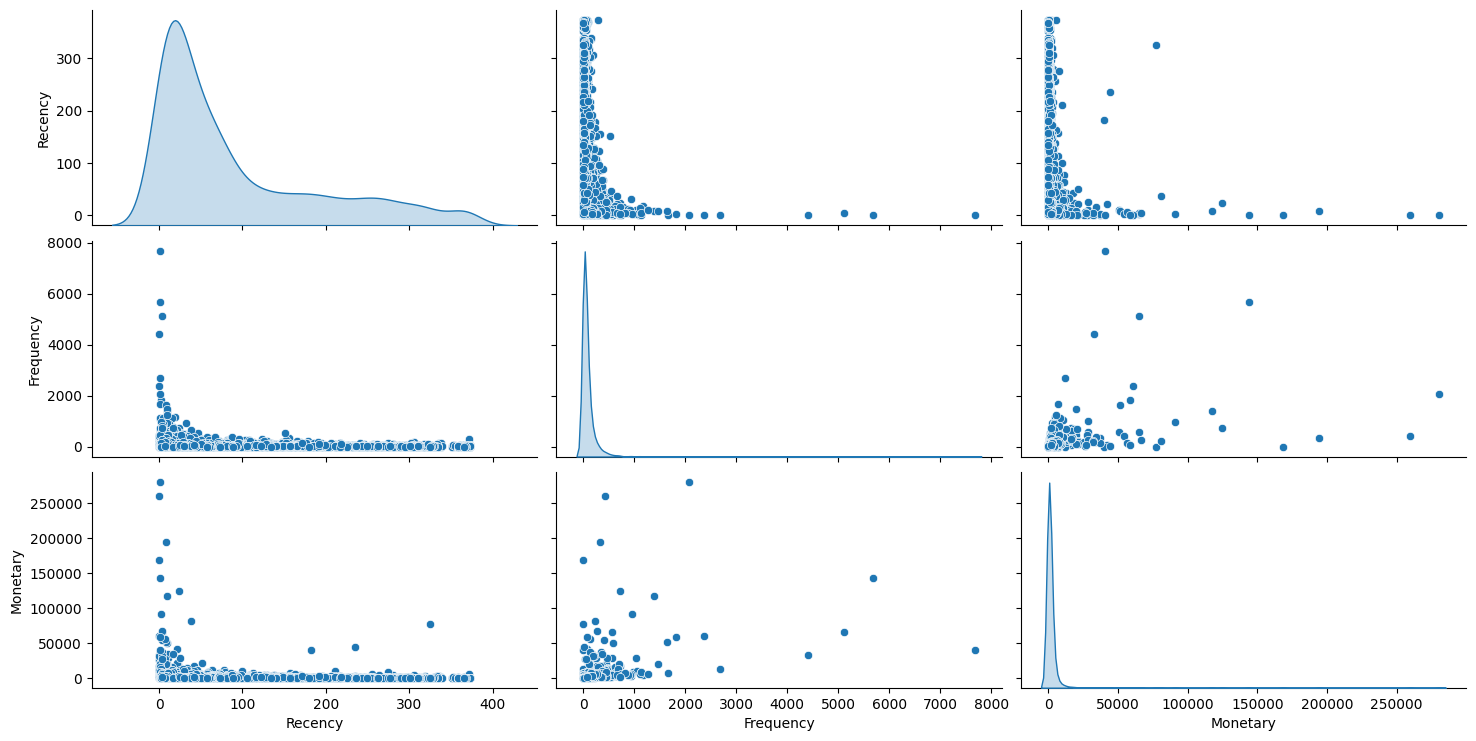

In [605]:
sns.pairplot(rfm_df[["Recency", "Frequency", "Monetary"]], diag_kind="kde", aspect=2);

**Applying log transformation to Recency , Monetary and Frequency value**

In [606]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

In [607]:
# Perform Log transformation to bring data into normal or near normal distribution
rfm_df[['Log_recency', 'Log_frequency', 'Log_monetary']] = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

**Distribution plots after normalizing the data.**

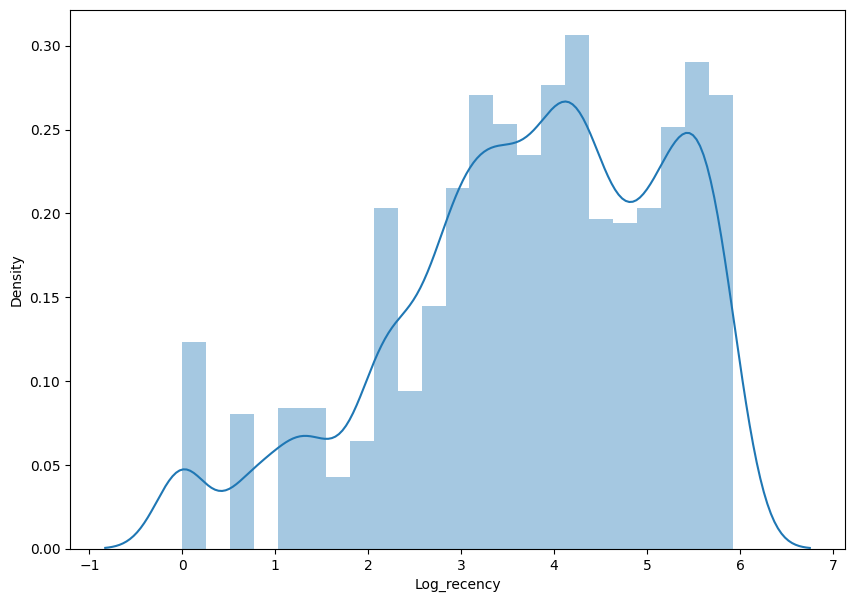

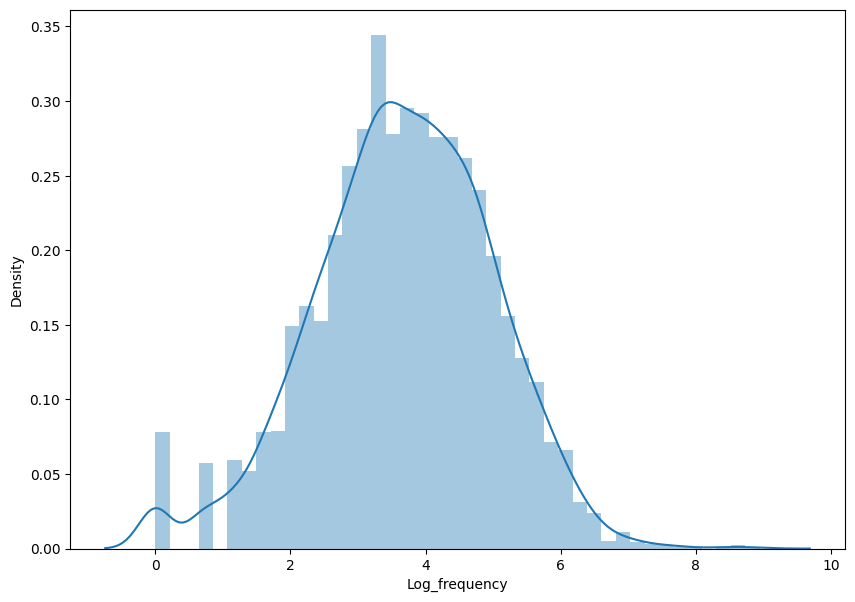

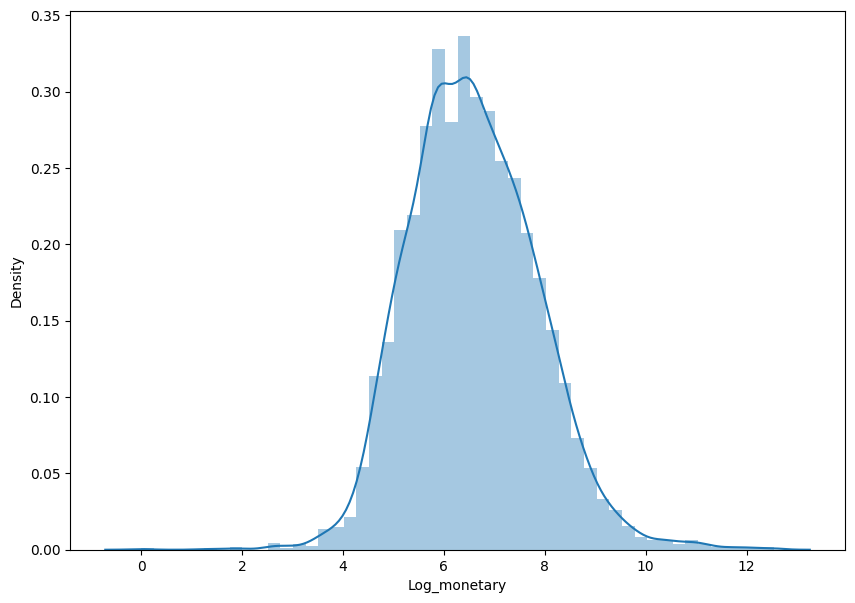

In [608]:
plots_rfm(rfm_df, 'Log_recency', 'Log_frequency', 'Log_monetary')

In [609]:
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   

            Log_recency  Log_frequency  Log_monetary  
CustomerID                                            
12346.0           5.784          0.000        11.254  
12347.0           0.693          5.204         8.369  
12348.0           4.317          3.434         7.494  
12349.0           2.890          4.290         7.472  
12350.0           5.737          2.833         5.812

#**Clustering**


K-Means Clustering

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.

KMeans requires the number of clusters to be specified during the model building process. To know the right number of clusters, methods such as silhouette analysis and elbow method can be used. These methods will help in selection of the optimum number of clusters.

##**Applying Silhouette Score Method on Recency and Monetary**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.



In [610]:
#silhoutte score
features_rec_mon=['Log_recency','Log_monetary']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42050794366484184
For n_clusters = 3, silhouette score is 0.3415629996671866
For n_clusters = 4, silhouette score is 0.36464607065057647
For n_clusters = 5, silhouette score is 0.33667719120423073
For n_clusters = 6, silhouette score is 0.343702264144878
For n_clusters = 7, silhouette score is 0.34672337230470657
For n_clusters = 8, silhouette score is 0.3375400019713343
For n_clusters = 9, silhouette score is 0.34513974312736356
For n_clusters = 10, silhouette score is 0.34820958717548356
For n_clusters = 11, silhouette score is 0.3373069310912869
For n_clusters = 12, silhouette score is 0.34347158528980376
For n_clusters = 13, silhouette score is 0.34037189009677465
For n_clusters = 14, silhouette score is 0.34216414395920297
For n_clusters = 15, silhouette score is 0.3364157564452506


**Applying Elbow Method on Recency and Monetary**

Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.



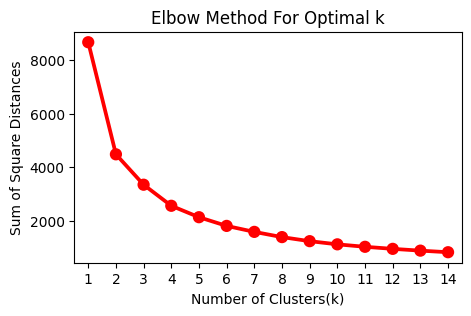

In [612]:
#applying elbow method
features_rec_mon=['Log_recency','Log_monetary']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(5,3))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**MODEL-1** - Kmeans clustering on Recency and Monetary

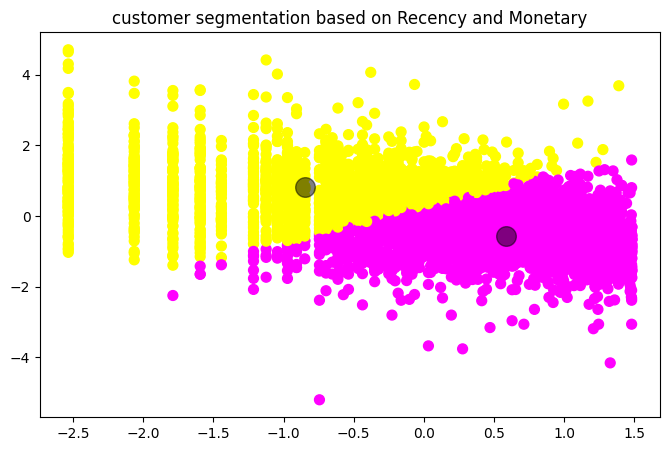

In [614]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
plt.figure(figsize=(8,5))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Observation:** we can see that, Customers are well separated when we cluster them by Recency and Monetary.

**MODEL-2** -  DBSCAN Clustering on Recency and Monetary

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density.It groups ‘densely grouped’ data points into a single cluster.

**Applying DBSCAN on Recency and Monetary**

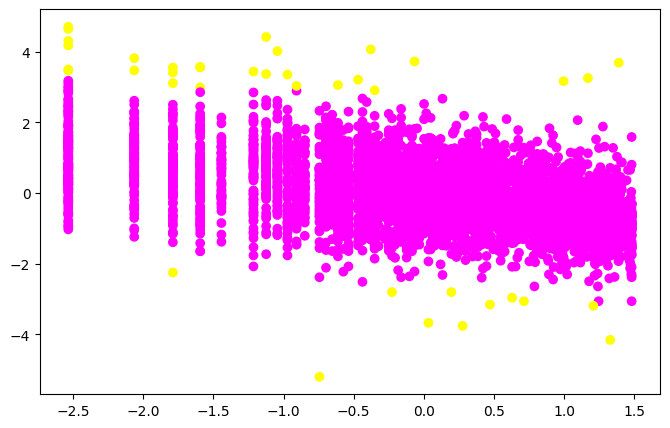

In [615]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap='spring_r');

**Observation:** We can see that, Customers are separated when we cluster them by Recency and Monetary.

##**Applying silhouette Score Method on Frquency and Monetary**

In [616]:
#silhouetee score
features_fre_mon=['Log_frequency','Log_monetary']
X_features_fre_mon=rfm_df[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784151786971559
For n_clusters = 3, silhouette score is 0.4077086635827451
For n_clusters = 4, silhouette score is 0.3723034160827965
For n_clusters = 5, silhouette score is 0.3473431107350898
For n_clusters = 6, silhouette score is 0.36267559816904743
For n_clusters = 7, silhouette score is 0.3442493428354039
For n_clusters = 8, silhouette score is 0.3313159140856194
For n_clusters = 9, silhouette score is 0.3462616194557538
For n_clusters = 10, silhouette score is 0.35970333009884553
For n_clusters = 11, silhouette score is 0.366013525551376
For n_clusters = 12, silhouette score is 0.3582701637790928
For n_clusters = 13, silhouette score is 0.363395767552465
For n_clusters = 14, silhouette score is 0.3693102083629614
For n_clusters = 15, silhouette score is 0.362700136752051


**Applying Elbow Method on Frequency and Monetary**

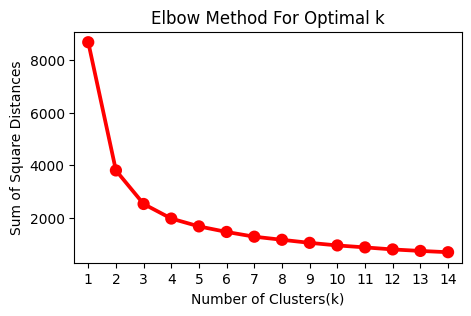

In [618]:
from sklearn.cluster import KMeans
#applying elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(5,3))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**MODEL-3 - Kmeans clustering on Frequence and Monetary**

In [619]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

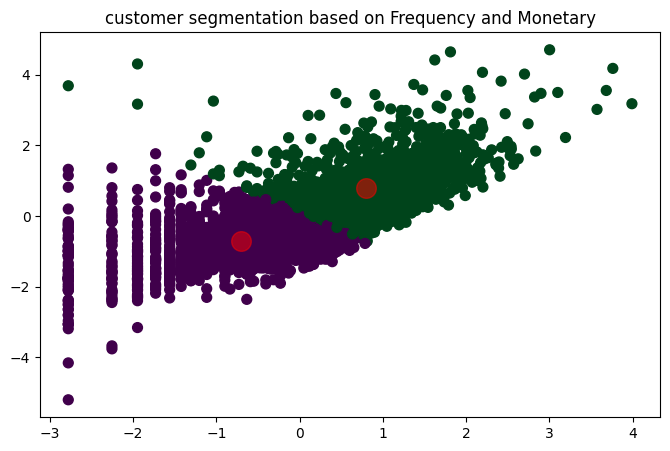

In [620]:
#plotting graph based on frequency and monetary
plt.figure(figsize=(8,5))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PRGn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

**Observation:** we can see that, Customers are separated when we cluster them by Frequency and Monetary.

**Model-4 - DBSCAN Method on Frquency and Monetary**

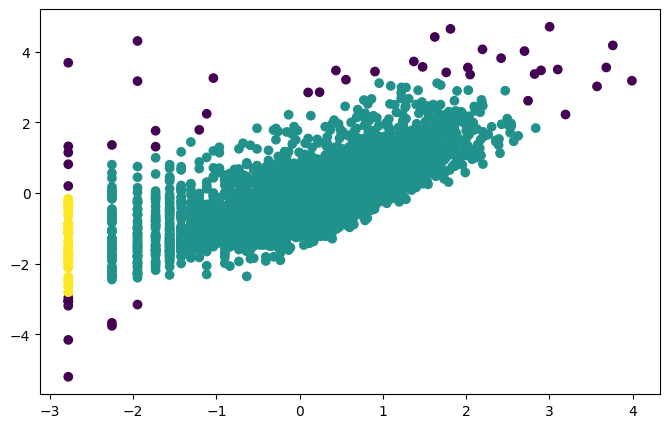

In [622]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_pred);

##**Applying Silhouette Method on Recency, Frequency and Monetary**

In [623]:
#scaling features
feature_vector=['Log_recency','Log_frequency','Log_monetary']
X_features=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)


For n_clusters = 2 The average silhouette_score is : 0.39558717414954764
For n_clusters = 3 The average silhouette_score is : 0.3056586183871933
For n_clusters = 4 The average silhouette_score is : 0.30270930768717474
For n_clusters = 5 The average silhouette_score is : 0.27924138732581494
For n_clusters = 6 The average silhouette_score is : 0.27907633801844484
For n_clusters = 7 The average silhouette_score is : 0.26641854833284867
For n_clusters = 8 The average silhouette_score is : 0.26448235649880614
For n_clusters = 9 The average silhouette_score is : 0.2530600691118209
For n_clusters = 10 The average silhouette_score is : 0.25233779101335063


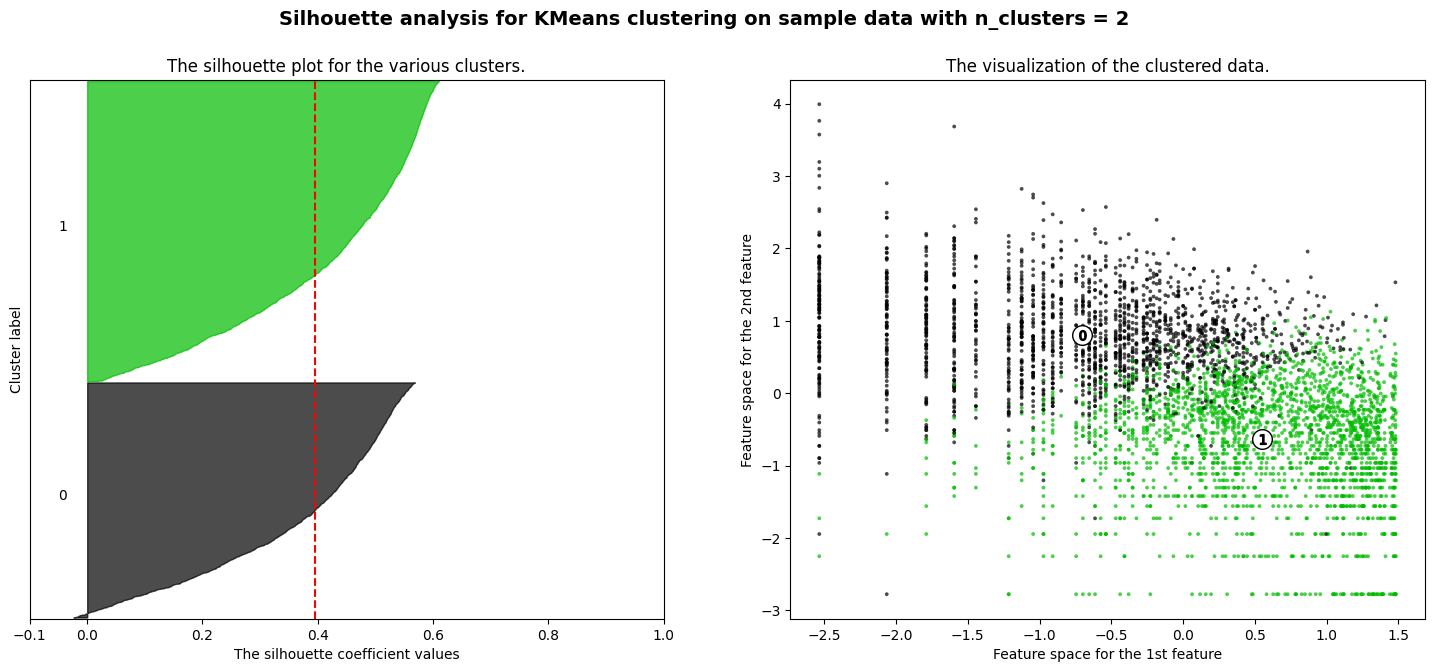

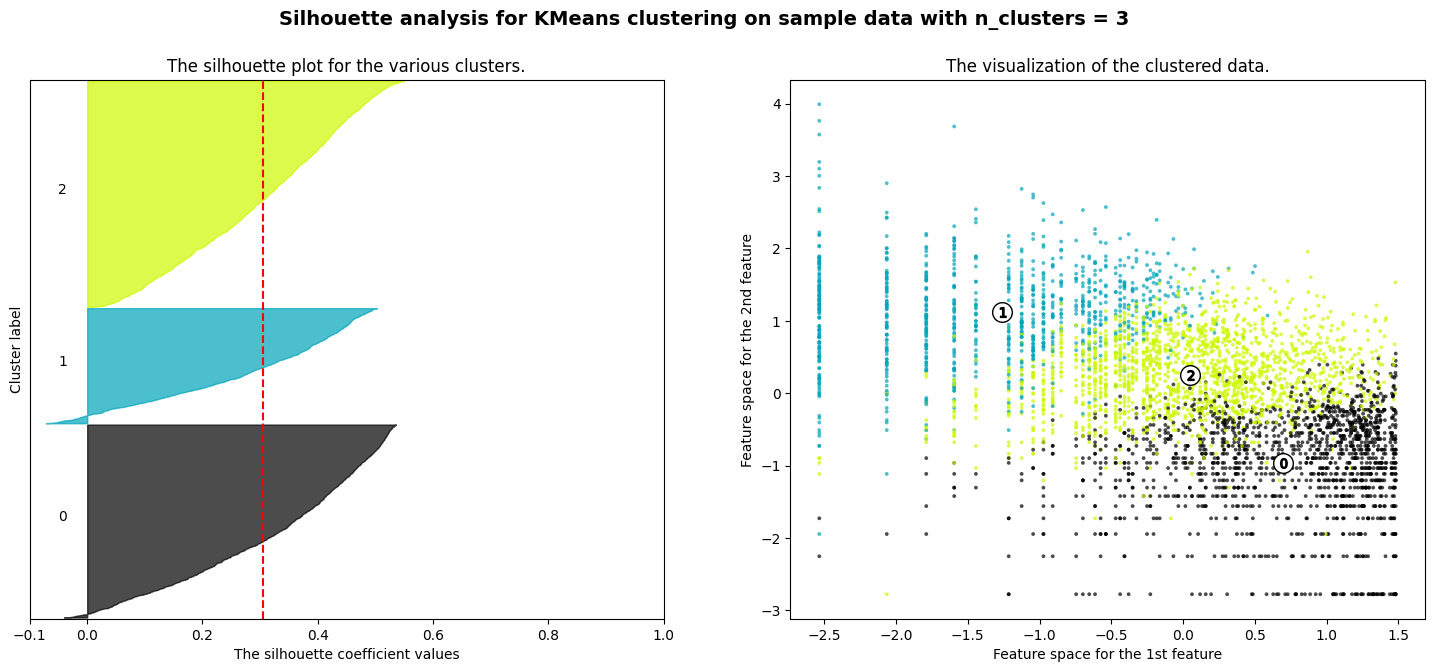

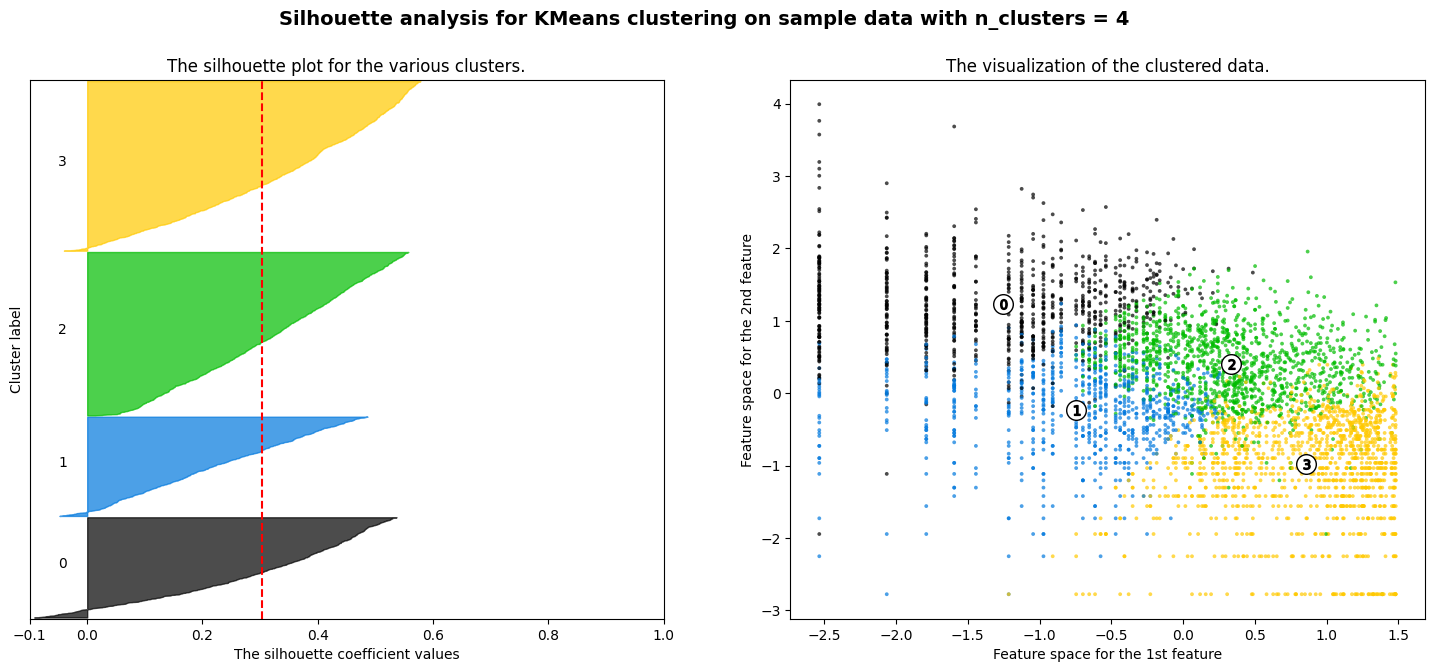

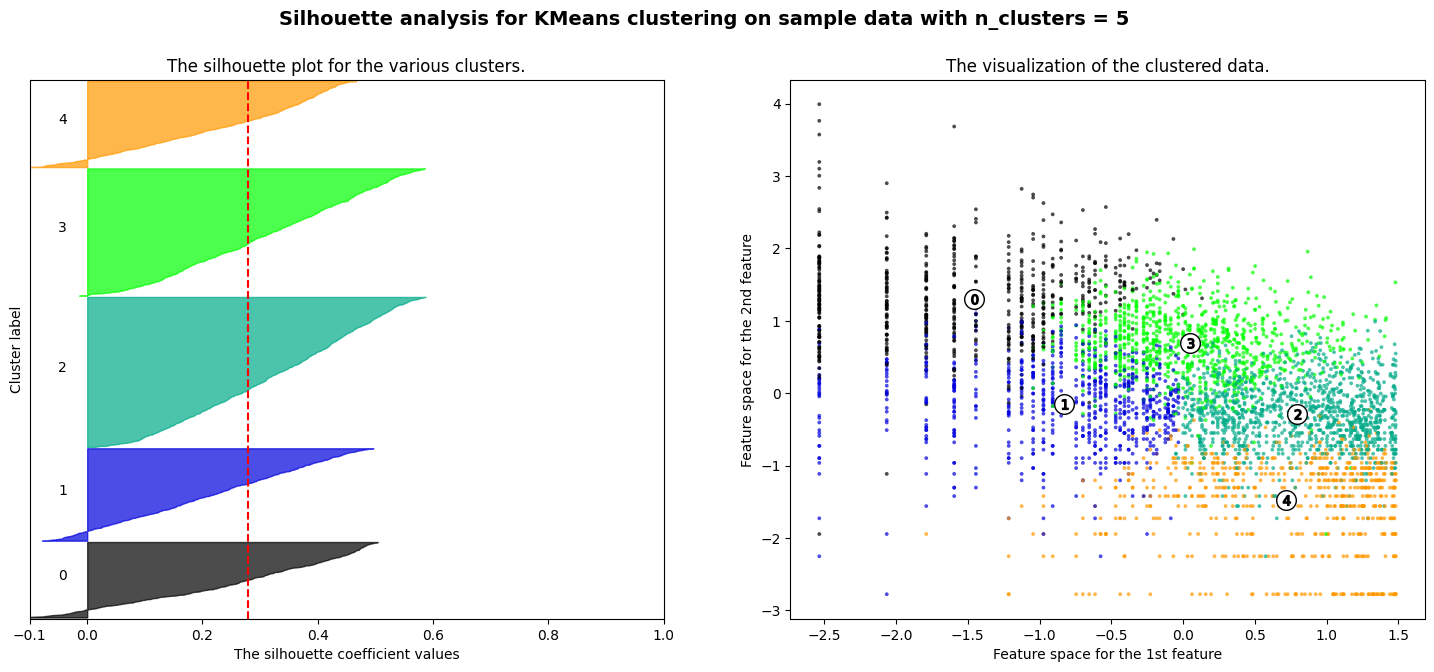

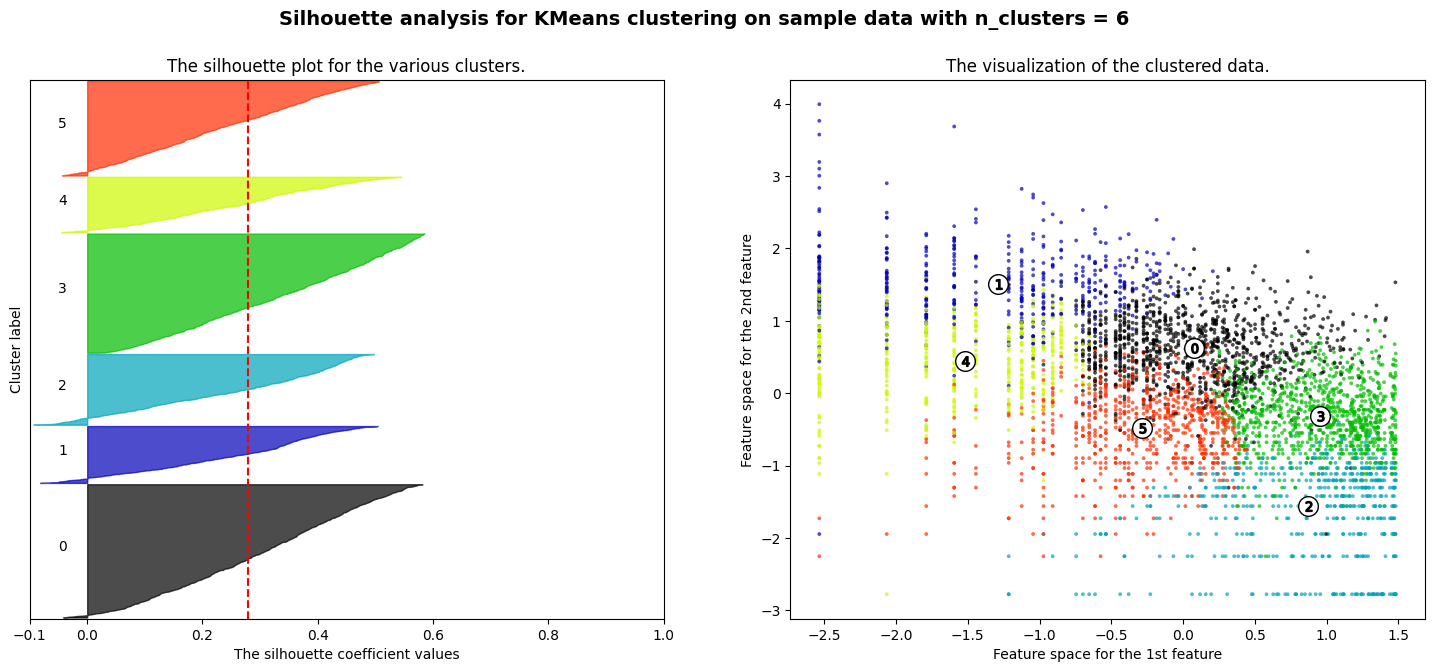

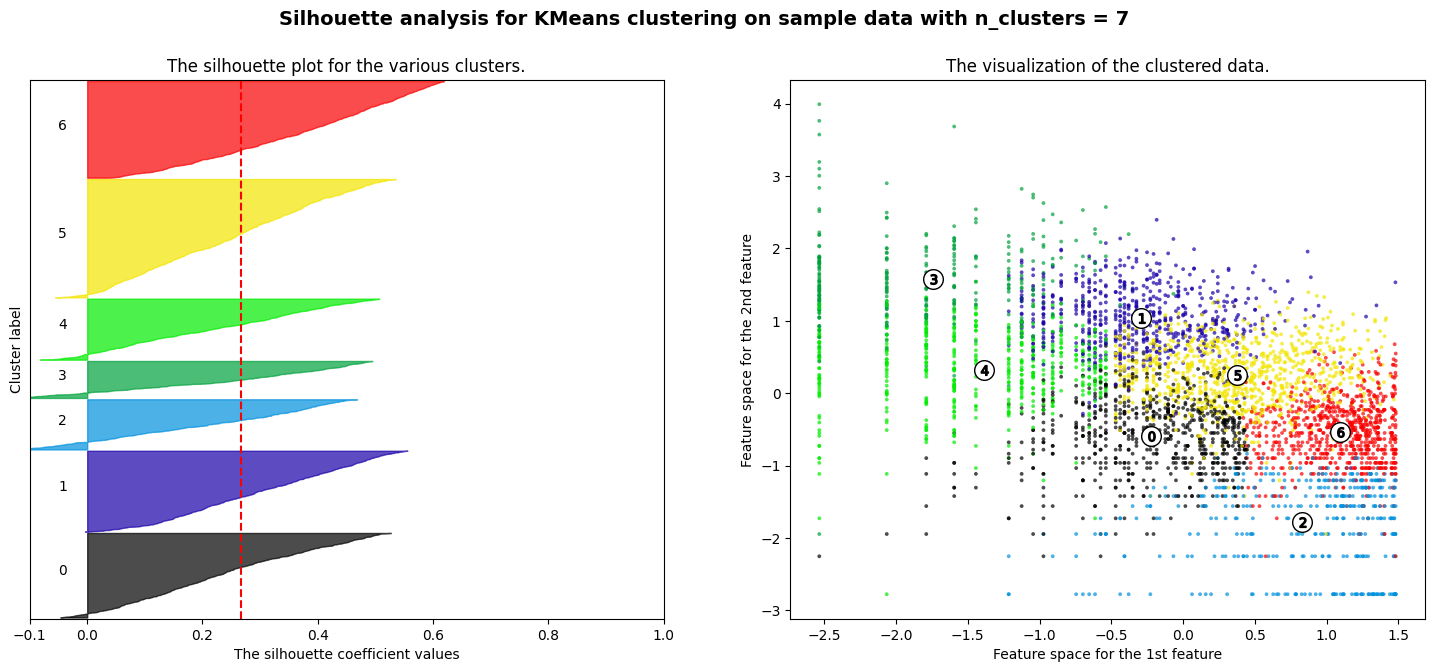

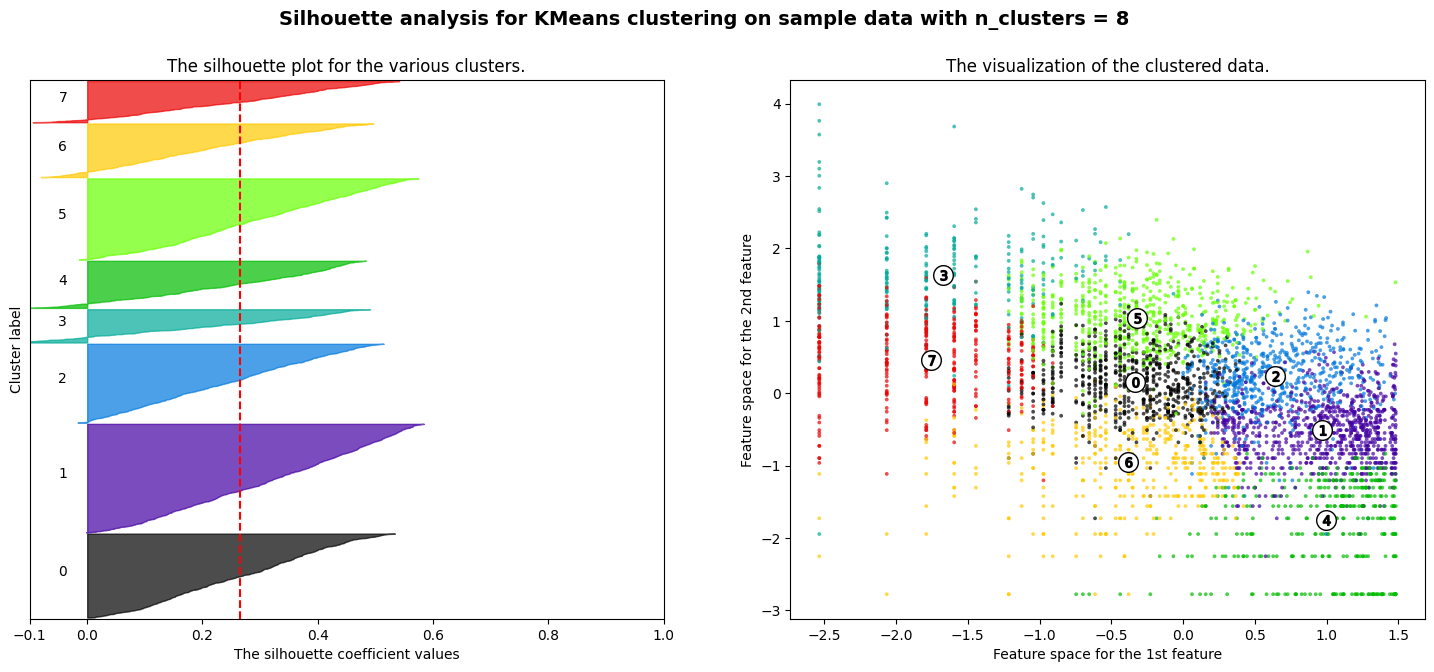

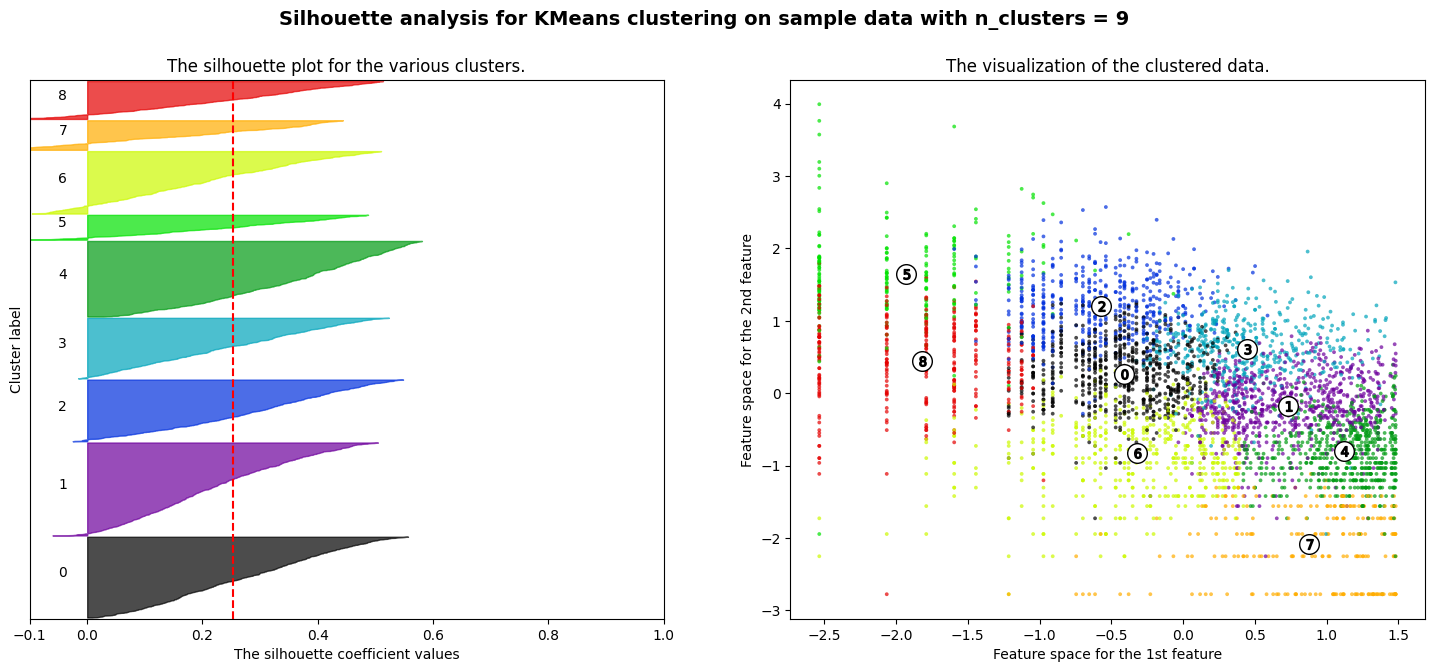

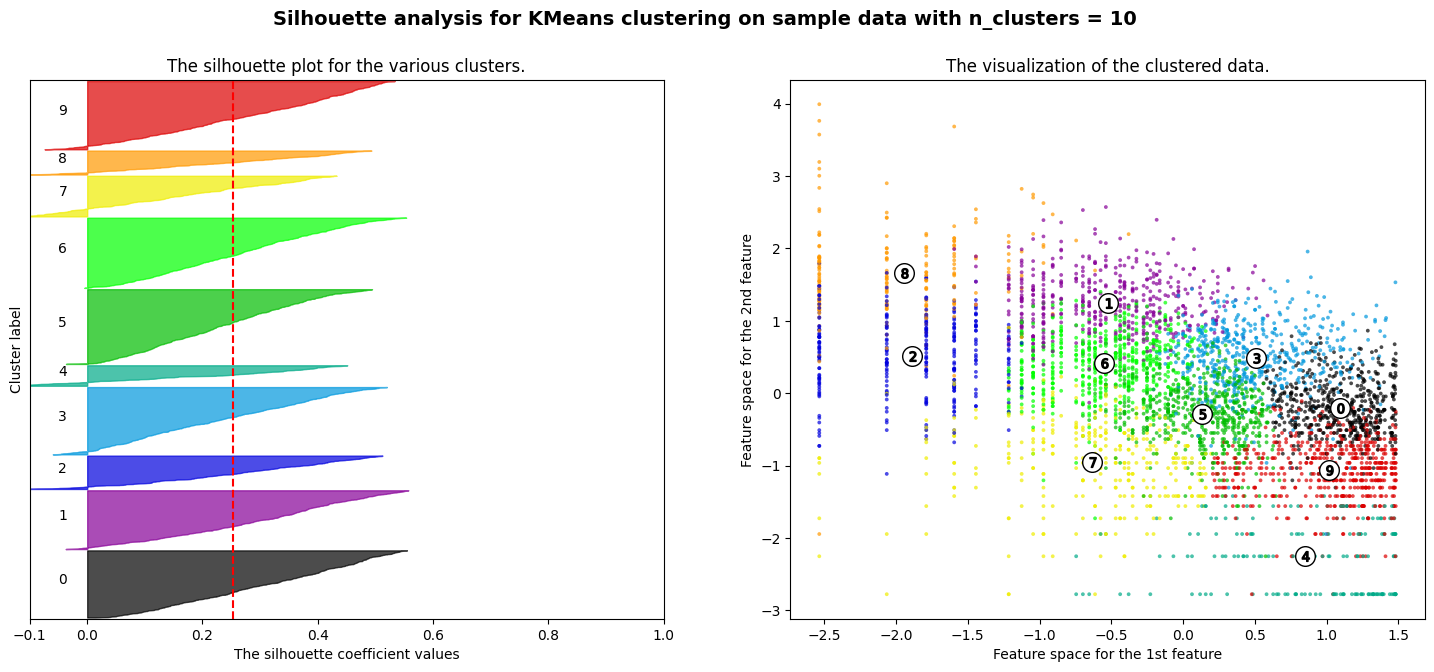

In [624]:
#applying silhouette method on RFM
range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Observation:** From the silhouette analysis, it is clearly understood that, 2 clusters are performing best. Hence, 2 clusters will be selected to build the KMeans model and classify the customers.

**Applying Elbow Method on Recency, Frequency and Monetary**

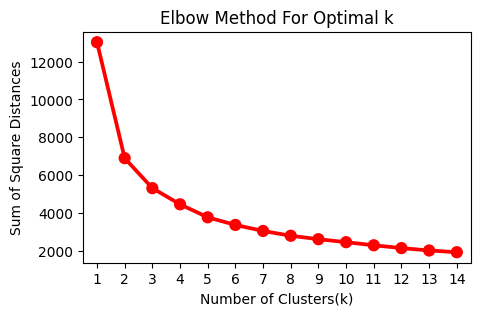

In [626]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(5,3))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()),color='r')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**MODEL-5 - Kmeans Clustering on on Recency, Frequency and Monetary**

In [627]:
# KMeans with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

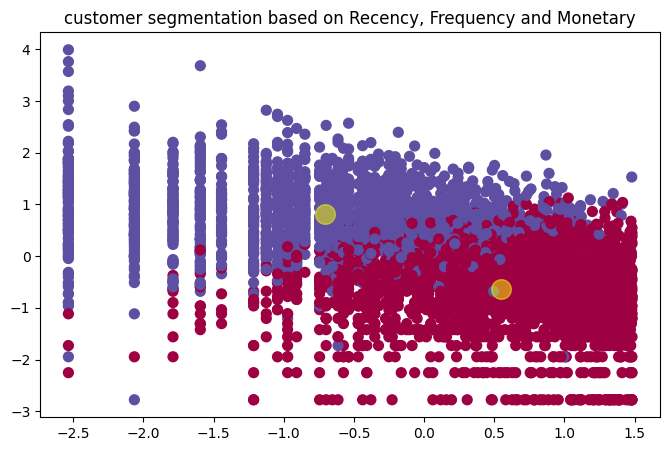

In [628]:
#plotting figure
plt.figure(figsize=(8,5))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5);

**Observation:** we can see that, Customers are separated when we cluster them by Recency, Frequency and Monetary.

**MODEL-6 - DBSCAN to Recency, Frequency and Monetary**

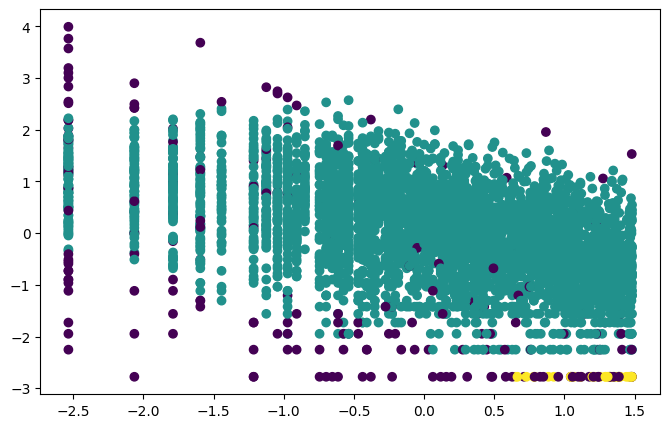

In [629]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=y_pred);

**Observation:** we can see that, Customers are well separated when we cluster them by Recency, Frequency and Monetary and optimal number of cluster is equal to 3

In [630]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Log_recency  Log_frequency  Log_monetary  Cluster  
CustomerID                                                     
12346.0           5.784          0.000        11.254        1  
12347.0           0.693          5.204         8.369        0  
12348.0           4.317          3.434         7.494        1  
12349.0           2.890          4.290         7.472        0  
12350.0           5.737          2.833         5.812        1  
12352.0           3.584          4.443         7.826        0  
12353.0           5.318          1.386         4.489        1  
12354.0           5.447          4.060         6.984        1  
12355.0           5.366          2.565         6.130        1  
12356.0           3.091          4.078         7.941        0

##Hierarchical clustering

Hierarchical clustering is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.

**Dendogram to find the optimal number of clusters:**

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.



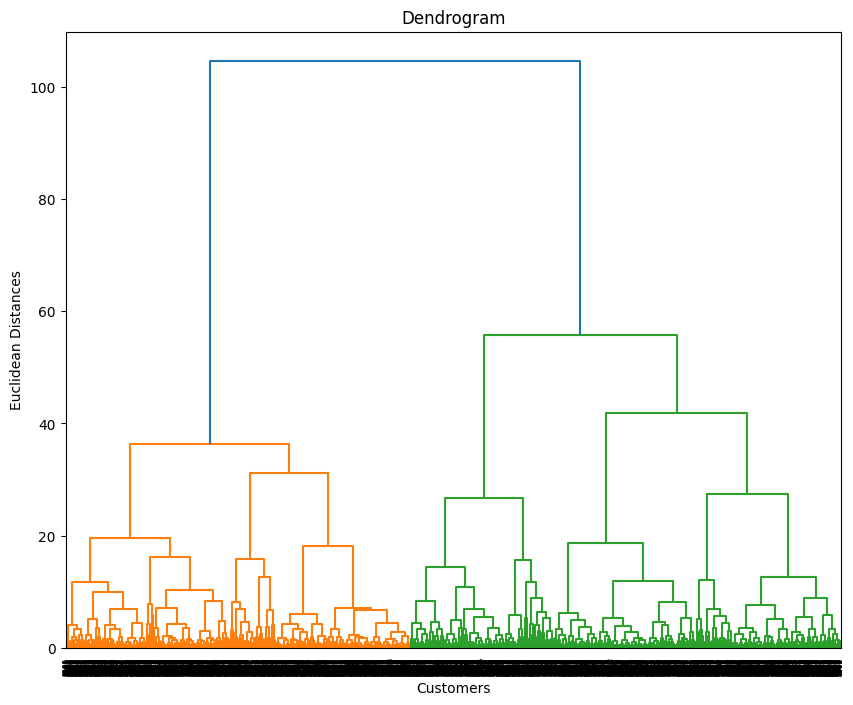

In [631]:
# Using the dendogram to find the optimal number of clusters
#importing necessary library
import scipy.cluster.hierarchy as sch
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(10,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

**Observation** From the above dendogram, we can see No. of Clusters = 2

**MODEL-7** - Hierarchical Clustering

In [632]:
# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

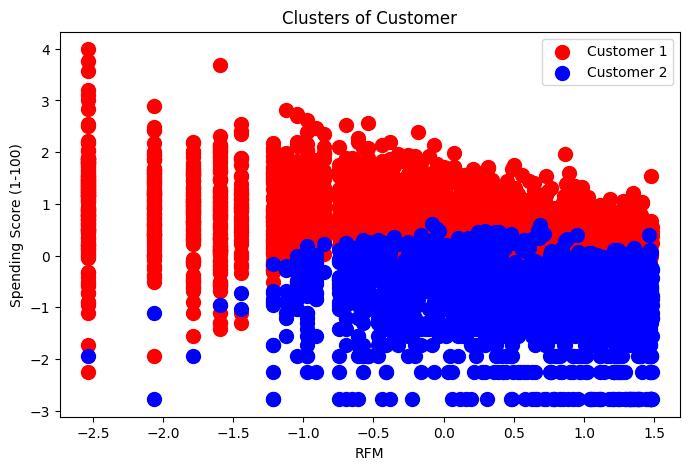

In [633]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(8,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [634]:
#let's check mean values of the cluster for recency, frequnecy and monetary

rfm_df.groupby('Cluster').agg({'Recency':'mean',
                               'Frequency':'mean',
                               'Monetary':'mean'})

Recency   Frequency     Monetary
Cluster                                     
0         30.801349  172.857365  4024.092750
1        141.027789   24.663210   468.170499

We can see from above that the customer belongs to cluster 1 are premium customers and we can keep them in comapny's loyalty program and for the customer belongs to cluster 0 we can provide them offer or create some strategies for them so that they will do more transaction with us.

#**Summary**

In [635]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['Sr No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"DBSCAN ", "RFM", "3"])
myTable.add_row(['10',"Hierarchical clustering  ", "RFM", "2"])

print(myTable)

+--------+--------------------------------+------+---------------------------+
| Sr No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |            DBSCAN              | RFM  |             3             |
|   10   |   Hierarchical clustering      | RFM  |  

#**Conclusion**

*  This project mainly focused on developing customer segments for a UK based online store, selling unique all occasion gifts.

*  Using a recency, frequency and monetary(RFM) analysis, the customers have been segmented into various clusters and got a silhoutte score of 0.39 for two clusters

*  By applying different clustering algorithm to our dataset, we get the optimal number of cluster is equal to 2.

*  The business can focus on these different clusters and provide customer with services of each sector in a different way, which would not only benefit the customers but also the business at large.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***